In [95]:
from typing import TypedDict, List 
from langgraph.graph import StateGraph, START , END
import random

In [96]:
class State(TypedDict):
    name : str
    greeting : str
    guesses : List[int]
    lower_bound : int
    upper_bound : int
    max_guesses : int
    attempts : int
    guess : int
    hint : str

def setup(state : State) -> State:
    """Set up the initial state for the guessing game """

    state['greeting'] = f"Welcome to the guessing game, {state['name']}!"
    state['guesses'] = []
    state['lower_bound'] = 1
    state['upper_bound'] = 20
    state['max_guesses'] = 7
    state['attempts' ] = 0
    state['hint'] = ""
    state['guess'] = 10
    return state


def guess(state : State) -> State:
    """ This node guesses a number at each time, 
        updates the list,
        takes into consideration the hints provided by the hint node"""
    
    if state['attempts'] != 0:
        if state['hint'] == "higher":
            state['lower_bound'] = state['guesses'][-1]
        else:
            state['upper_bound'] = state['guesses'][-1]   
        print("The hint is: ", state['hint'])             
    state['guesses'].append(random.randint(state['lower_bound'],state['upper_bound']))
    print(f"Guessing: {state['guesses'][-1]} at iteration {state['attempts'] +1}") 
    state["attempts"] += 1
    return state



def should_continue(state: State) -> str:
    """ 
        This node is responsible for for providing hints to the guesser 
        Stop  : 
        - if the guess is correct
        - if the maximum number of guesses is reached
        Continue:
        - if there are still guesses left
    """

    if state['attempts'] == state['max_guesses']:
        print("Maximum number of guesses reached.")
        print("The correct number was: ", state['guess'])
        return "stop"
    
    if state['guess'] == state['guesses'][-1]:
        return "stop"
    
    return "continue"
    


def hint(state: State) -> State:
    """ This node provides hints to the guesser based on the previous guess """
    
    if state['guess'] < state['guesses'][-1]:
        state['hint'] = "lower"

    elif state['guess'] > state['guesses'][-1]:    
        state['hint'] = "higher"

    return state







In [97]:
graph = StateGraph(State)
graph.add_node("setup",setup)
graph.add_node("guesser", guess)
graph.add_node("hint_giver", hint)

graph.add_edge(START,"setup")
graph.add_edge("setup","guesser")
graph.add_edge("guesser","hint_giver")

graph.add_conditional_edges("hint_giver",
                            should_continue,
                            {
                                "continue": "guesser",
                                "stop": END
                            })


In [98]:
app = graph.compile()

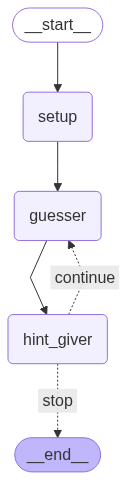

In [99]:
graph.compile()

In [100]:
app.invoke({"name": "Oumaima"})

Guessing: 13 at iteration 1
The hint is:  lower
Guessing: 6 at iteration 2
The hint is:  higher
Guessing: 12 at iteration 3
The hint is:  lower
Guessing: 9 at iteration 4
The hint is:  higher
Guessing: 12 at iteration 5
The hint is:  lower
Guessing: 9 at iteration 6
The hint is:  higher
Guessing: 10 at iteration 7
Maximum number of guesses reached.
The correct number was:  10


{'name': 'Oumaima',
 'greeting': 'Welcome to the guessing game, Oumaima!',
 'guesses': [13, 6, 12, 9, 12, 9, 10],
 'lower_bound': 9,
 'upper_bound': 12,
 'max_guesses': 7,
 'attempts': 7,
 'guess': 10,
 'hint': 'higher'}